<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-05-23 18:34:09--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  56.1MB/s    in 2.7s    

2025-05-23 18:34:13 (56.1 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


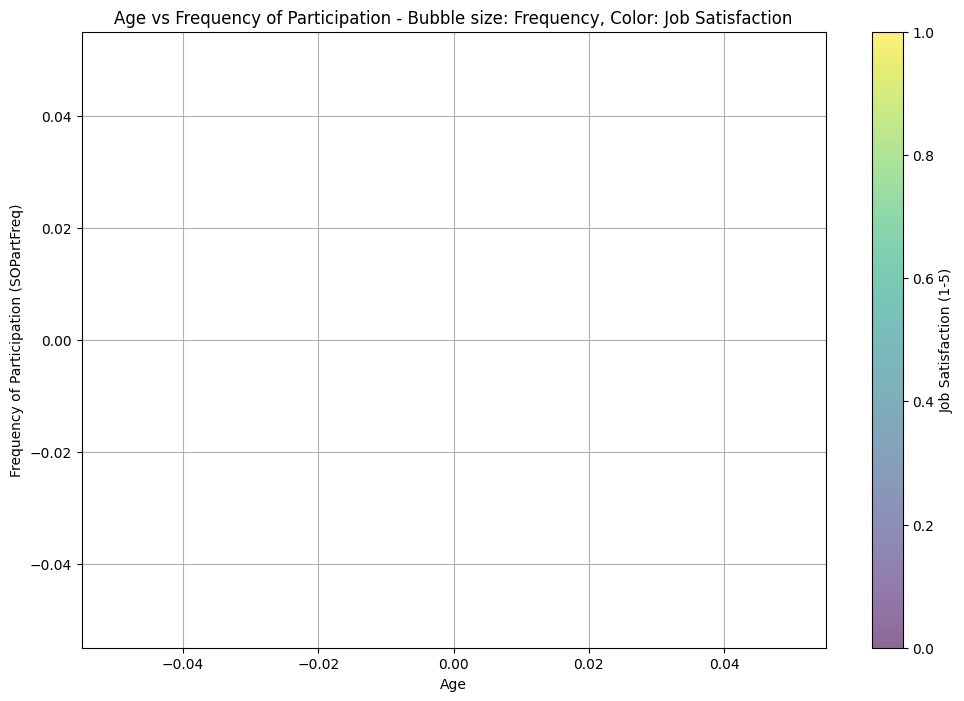

In [11]:
##Write your code here
# Convert 'Age' to numeric, drop missing values for required columns
# Convert 'Age' to numeric and drop missing values
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna(subset=['Age', 'SOPartFreq', 'JobSat'])

# Create a frequency count for Age and SOPartFreq
age_freq = df.groupby(['Age', 'SOPartFreq']).size().reset_index(name='Count')

# Map JobSat to numerical values for bubble size
job_sat_map = {
    'Very dissatisfied': 1,
    'Somewhat dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Somewhat satisfied': 4,
    'Very satisfied': 5
}
df['JobSat_num'] = df['JobSat'].map(job_sat_map)

# Calculate average job satisfaction for each Age and SOPartFreq combination
avg_job_sat = df.groupby(['Age', 'SOPartFreq'])['JobSat_num'].mean().reset_index()

# Merge the data
plot_data = pd.merge(age_freq, avg_job_sat, on=['Age', 'SOPartFreq'])

plt.figure(figsize=(12, 8))
plt.scatter(
    plot_data['Age'], 
    plot_data['SOPartFreq'], 
    s=plot_data['Count']*10,  # Scale bubble size by frequency
    c=plot_data['JobSat_num'],  # Color by job satisfaction
    cmap='viridis',
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5
)
plt.colorbar(label='Job Satisfaction (1-5)')
plt.xlabel('Age')
plt.ylabel('Frequency of Participation (SOPartFreq)')
plt.title('Age vs Frequency of Participation - Bubble size: Frequency, Color: Job Satisfaction')
plt.grid(True)
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


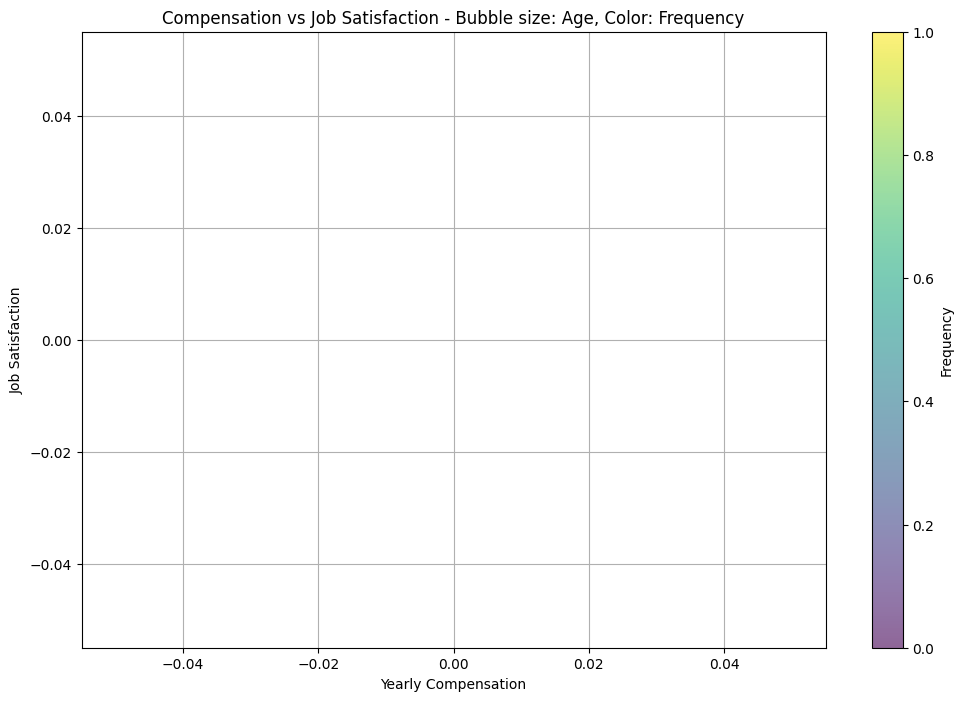

In [12]:
##Write your code here
# Convert compensation to numeric and drop missing values
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df = df.dropna(subset=['ConvertedCompYearly', 'JobSat', 'Age'])

# Create a frequency count for Compensation and JobSat
comp_freq = df.groupby(['ConvertedCompYearly', 'JobSat']).size().reset_index(name='Count')

# Calculate average age for each Compensation and JobSat combination
avg_age = df.groupby(['ConvertedCompYearly', 'JobSat'])['Age'].mean().reset_index()

# Merge the data
plot_data = pd.merge(comp_freq, avg_age, on=['ConvertedCompYearly', 'JobSat'])

plt.figure(figsize=(12, 8))
plt.scatter(
    plot_data['ConvertedCompYearly'], 
    plot_data['JobSat'], 
    s=plot_data['Age']*10,  # Scale bubble size by age
    c=plot_data['Count'],  # Color by frequency
    cmap='viridis',
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5
)
plt.colorbar(label='Frequency')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.title('Compensation vs Job Satisfaction - Bubble size: Age, Color: Frequency')
plt.grid(True)
plt.show()


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



/tmp/ipykernel_1221/3095430858.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table = df_expanded.groupby(['AgeGroup', 'Language']).size().reset_index(name='Count')
/tmp/ipykernel_1221/3095430858.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')


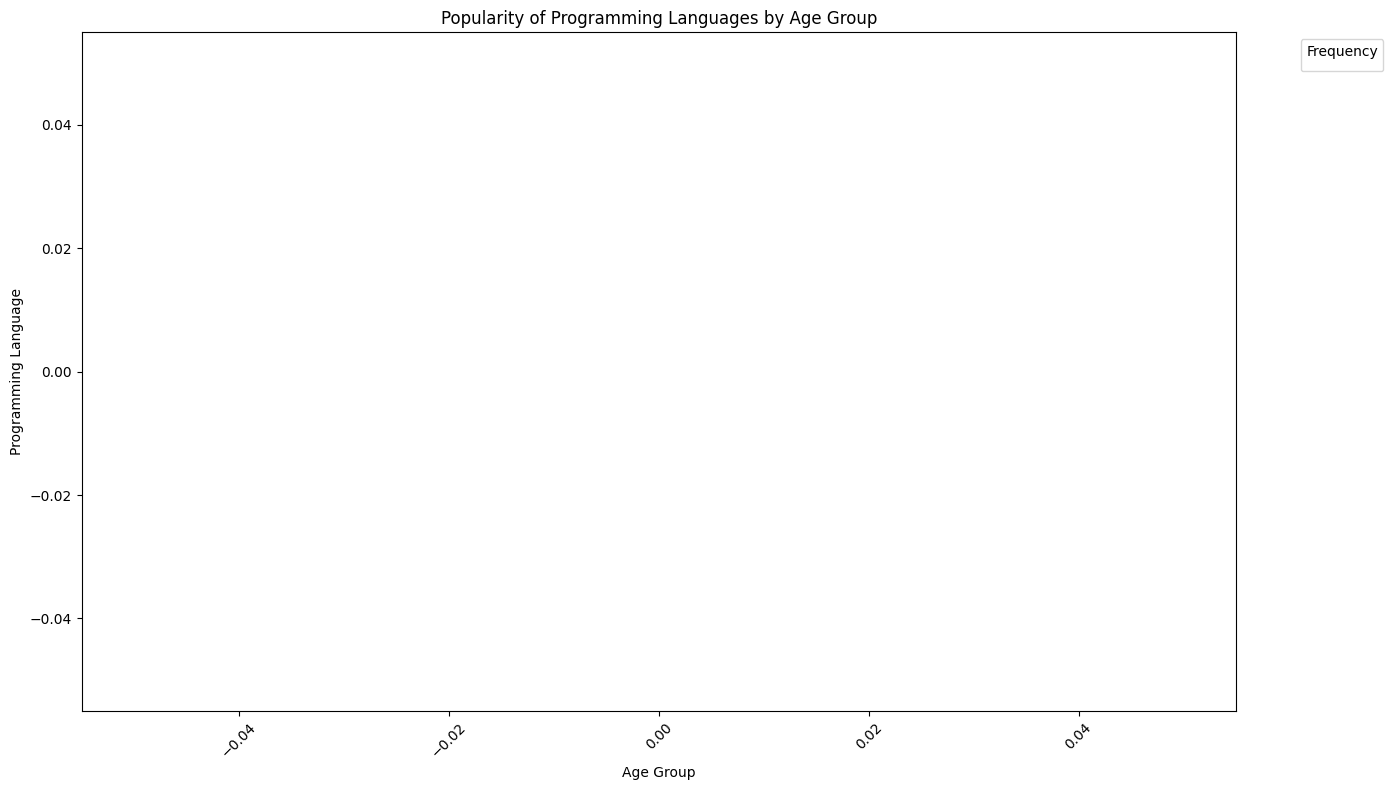

In [5]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure Age is numeric and create AgeGroup bins
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna(subset=['Age', 'LanguageHaveWorkedWith'])

age_bins = [18, 25, 35, 45, 55, 65, 75, 100]
age_labels = ['18–24', '25–34', '35–44', '45–54', '55–64', '65–74', '75+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Explode the languages to count frequency by AgeGroup
# LanguageHaveWorkedWith is a string of languages separated by ';'
df_expanded = df.assign(Language=df['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

# Strip whitespace from language names
df_expanded['Language'] = df_expanded['Language'].str.strip()

# Count frequency of each language by age group
freq_table = df_expanded.groupby(['AgeGroup', 'Language']).size().reset_index(name='Count')

# Remove rows with missing AgeGroup or Language
freq_table = freq_table.dropna(subset=['AgeGroup', 'Language'])

# Plot bubble plot
plt.figure(figsize=(14, 8))
sns.scatterplot(data=freq_table,
                x='AgeGroup',
                y='Language',
                size='Count',
                sizes=(20, 500),
                legend='brief',
                alpha=0.7,
                edgecolor='black')

plt.title('Popularity of Programming Languages by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Programming Language')
plt.xticks(rotation=45)
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


/tmp/ipykernel_1221/2721968244.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Number of Respondents', bbox_to_anchor=(1.05, 1), loc='upper left')


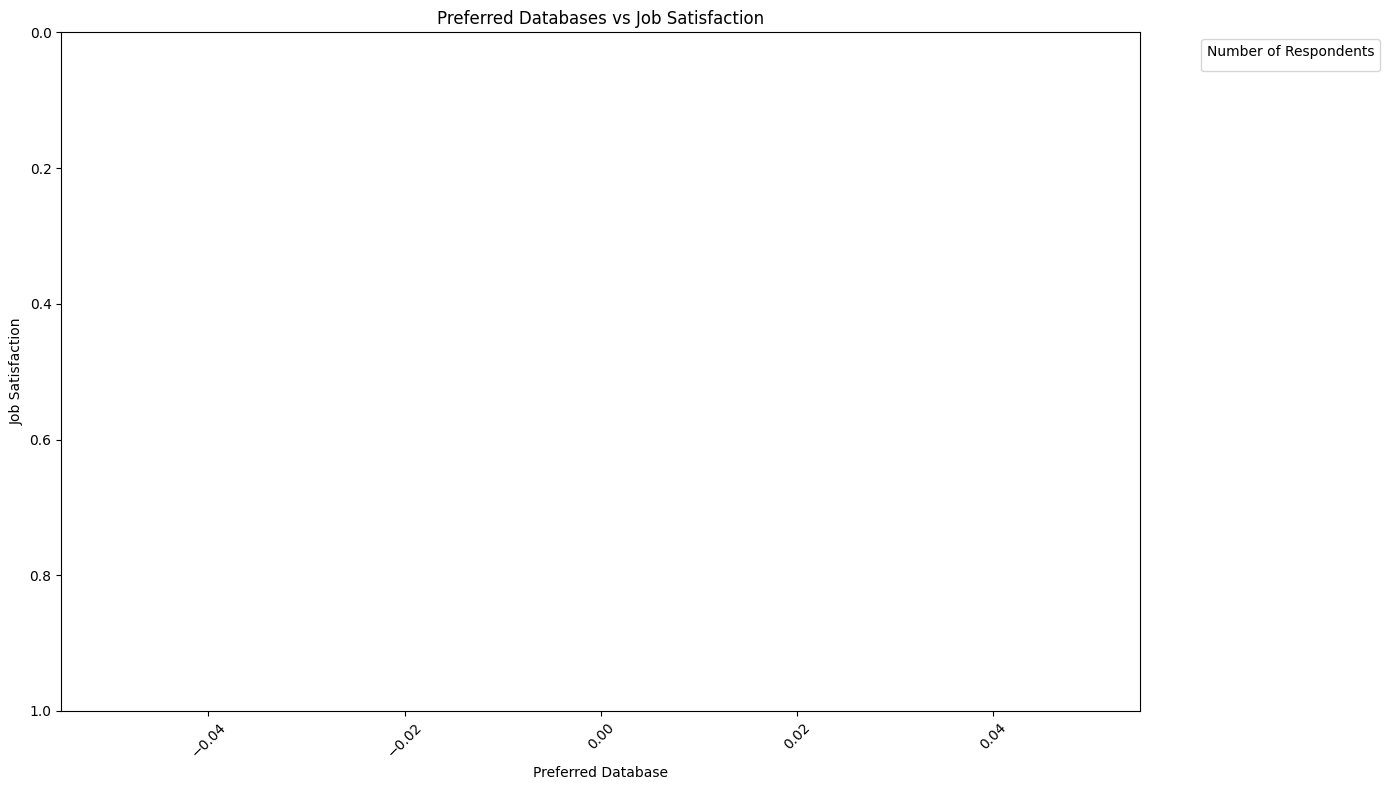

In [6]:
##Write your code here
# Make sure JobSat is clean and drop missing values
df = df.dropna(subset=['DatabaseWantToWorkWith', 'JobSat'])

# Explode the 'DatabaseWantToWorkWith' column to get one database per row
df_db_expanded = df.assign(Database=df['DatabaseWantToWorkWith'].str.split(';')).explode('Database')

# Strip whitespace
df_db_expanded['Database'] = df_db_expanded['Database'].str.strip()

# Count respondents by Database and JobSat
count_db_jobsat = df_db_expanded.groupby(['Database', 'JobSat']).size().reset_index(name='Count')

# Drop missing or empty database entries
count_db_jobsat = count_db_jobsat[count_db_jobsat['Database'] != '']

# Sort job satisfaction categories (optional) for better y-axis order
job_sat_order = [
    'Very dissatisfied',
    'Somewhat dissatisfied',
    'Neither satisfied nor dissatisfied',
    'Somewhat satisfied',
    'Very satisfied'
]
count_db_jobsat['JobSat'] = pd.Categorical(count_db_jobsat['JobSat'], categories=job_sat_order, ordered=True)

# Plot bubble plot
plt.figure(figsize=(14, 8))
sns.scatterplot(data=count_db_jobsat,
                x='Database',
                y='JobSat',
                size='Count',
                sizes=(20, 600),
                alpha=0.7,
                edgecolor='black',
                legend='brief')

plt.title('Preferred Databases vs Job Satisfaction')
plt.xlabel('Preferred Database')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=45)
plt.legend(title='Number of Respondents', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


/tmp/ipykernel_1221/4135932514.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Job Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')


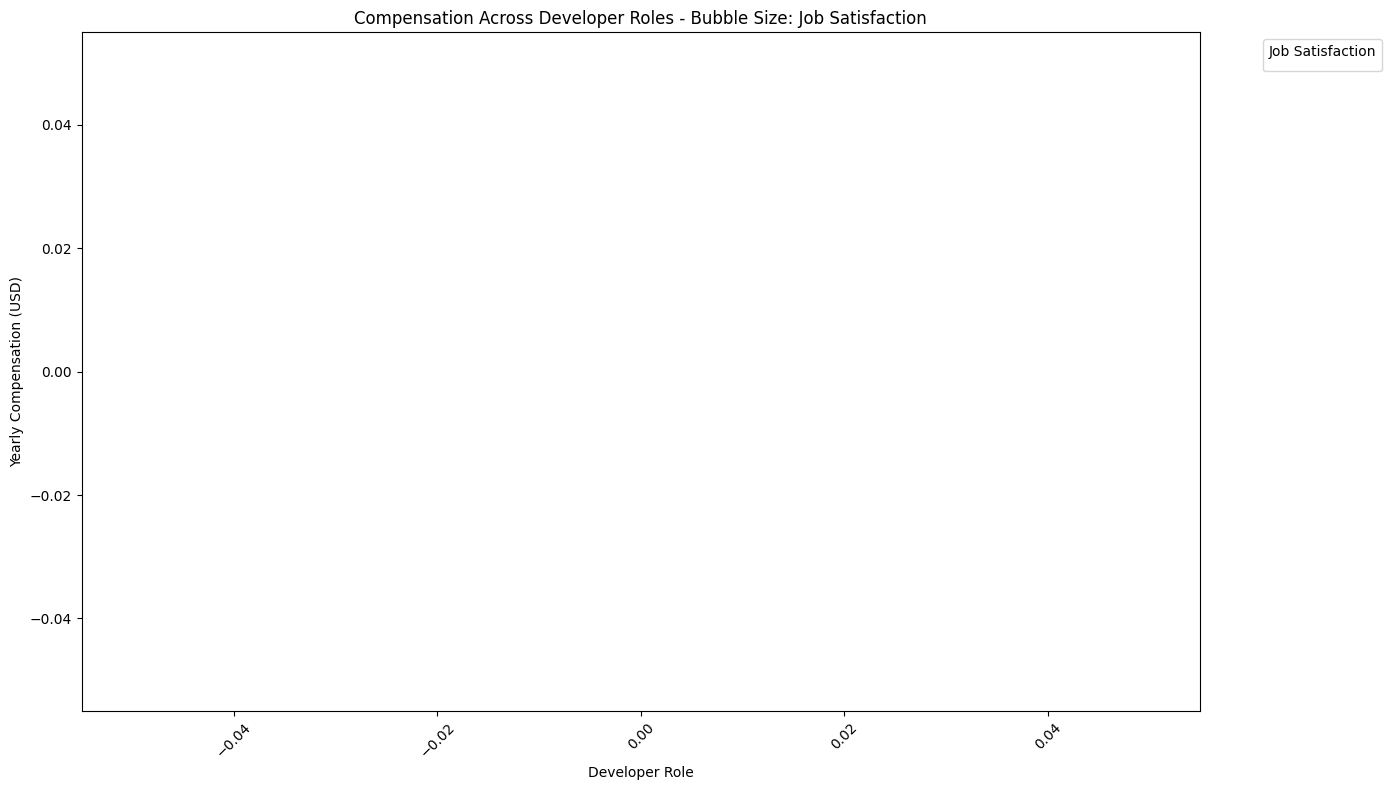

In [7]:
##Write your code here
import numpy as np

# Clean and prepare data
df = df.dropna(subset=['DevType', 'ConvertedCompYearly', 'JobSat'])

# Map job satisfaction to numeric (same as before)
job_sat_map = {
    'Very dissatisfied': 1,
    'Somewhat dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Somewhat satisfied': 4,
    'Very satisfied': 5
}
df['JobSat_num'] = df['JobSat'].map(job_sat_map)

# Explode DevType column
df_dev_expanded = df.assign(DevRole=df['DevType'].str.split(';')).explode('DevRole')
df_dev_expanded['DevRole'] = df_dev_expanded['DevRole'].str.strip()

# Drop empty roles if any
df_dev_expanded = df_dev_expanded[df_dev_expanded['DevRole'] != '']

# Optional: To avoid overcrowding, filter roles with sufficient data (e.g., at least 30 respondents)
role_counts = df_dev_expanded['DevRole'].value_counts()
roles_to_keep = role_counts[role_counts >= 30].index
df_dev_expanded = df_dev_expanded[df_dev_expanded['DevRole'].isin(roles_to_keep)]

plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_dev_expanded,
                x='DevRole',
                y='ConvertedCompYearly',
                size='JobSat_num',
                sizes=(20, 300),
                alpha=0.6,
                edgecolor='black',
                legend='brief')

plt.xticks(rotation=45)
plt.title('Compensation Across Developer Roles - Bubble Size: Job Satisfaction')
plt.xlabel('Developer Role')
plt.ylabel('Yearly Compensation (USD)')
plt.legend(title='Job Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


/tmp/ipykernel_1221/2685419923.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_tools = df_tools_expanded.groupby(['AgeGroup', 'Tool']).size().reset_index(name='Count')
/tmp/ipykernel_1221/2685419923.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')


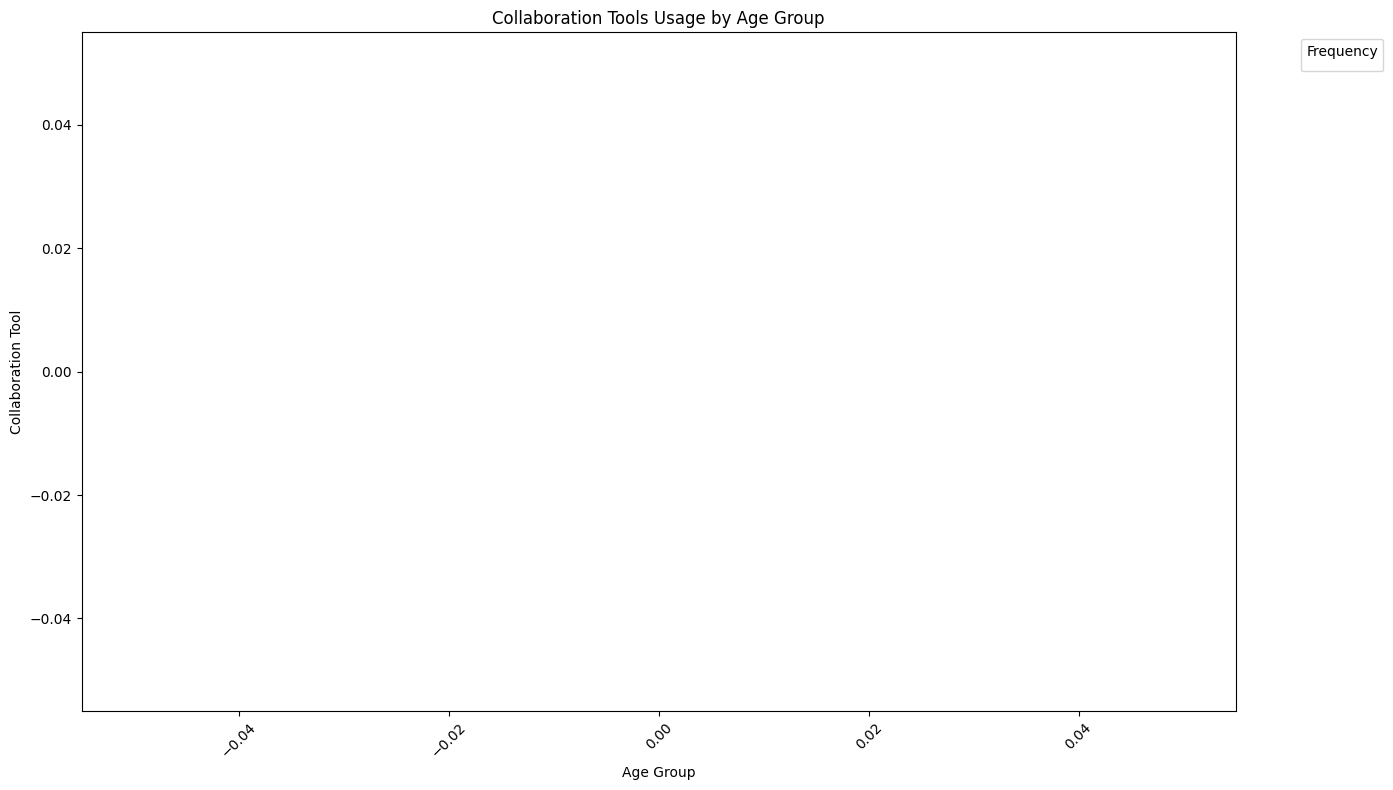

In [8]:
##Write your code here
# Ensure Age is numeric and create AgeGroup bins if not already done
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna(subset=['Age', 'NEWCollabToolsHaveWorkedWith'])

age_bins = [18, 25, 35, 45, 55, 65, 75, 100]
age_labels = ['18–24', '25–34', '35–44', '45–54', '55–64', '65–74', '75+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Explode collaboration tools
df_tools_expanded = df.assign(Tool=df['NEWCollabToolsHaveWorkedWith'].str.split(';')).explode('Tool')

# Clean whitespace
df_tools_expanded['Tool'] = df_tools_expanded['Tool'].str.strip()

# Count frequency by AgeGroup and Tool
freq_tools = df_tools_expanded.groupby(['AgeGroup', 'Tool']).size().reset_index(name='Count')

# Drop missing AgeGroup or Tool
freq_tools = freq_tools.dropna(subset=['AgeGroup', 'Tool'])

# Plot bubble plot
plt.figure(figsize=(14, 8))
sns.scatterplot(data=freq_tools,
                x='AgeGroup',
                y='Tool',
                size='Count',
                sizes=(20, 500),
                alpha=0.7,
                edgecolor='black',
                legend='brief')

plt.title('Collaboration Tools Usage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Collaboration Tool')
plt.xticks(rotation=45)
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



/tmp/ipykernel_1221/2755819483.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Number of Respondents', bbox_to_anchor=(1.05, 1), loc='upper left')


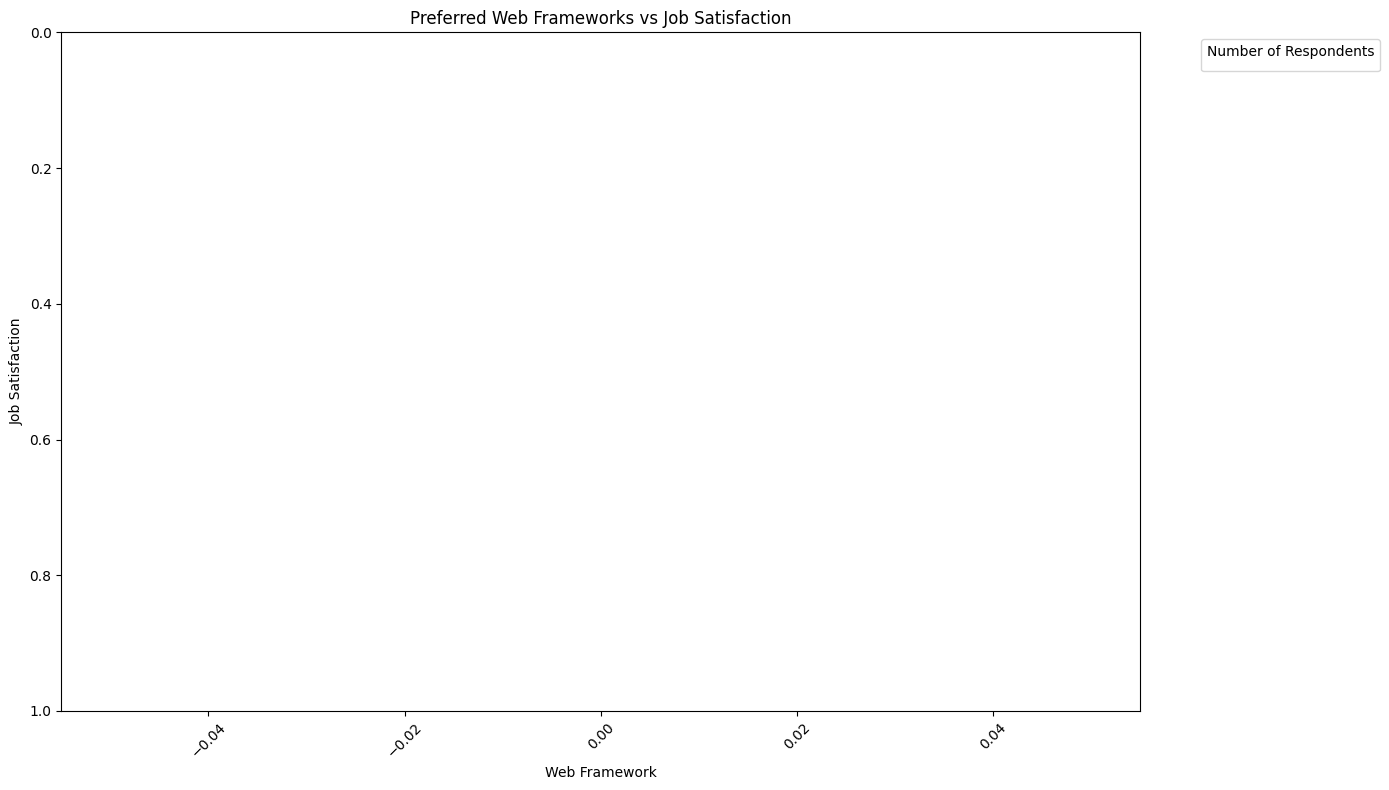

In [9]:
##Write your code here
# Drop rows with missing values in key columns
df = df.dropna(subset=['WebframeWantToWorkWith', 'JobSat'])

# Explode the semicolon-separated frameworks into individual rows
df_web_expanded = df.assign(WebFramework=df['WebframeWantToWorkWith'].str.split(';')).explode('WebFramework')
df_web_expanded['WebFramework'] = df_web_expanded['WebFramework'].str.strip()

# Count number of respondents per framework and job satisfaction
web_freq = df_web_expanded.groupby(['WebFramework', 'JobSat']).size().reset_index(name='Count')

# Sort job satisfaction levels for y-axis
job_sat_order = [
    'Very dissatisfied',
    'Somewhat dissatisfied',
    'Neither satisfied nor dissatisfied',
    'Somewhat satisfied',
    'Very satisfied'
]
web_freq['JobSat'] = pd.Categorical(web_freq['JobSat'], categories=job_sat_order, ordered=True)

# Plot bubble plot
plt.figure(figsize=(14, 8))
sns.scatterplot(data=web_freq,
                x='WebFramework',
                y='JobSat',
                size='Count',
                sizes=(20, 600),
                alpha=0.7,
                edgecolor='black',
                legend='brief')

plt.title('Preferred Web Frameworks vs Job Satisfaction')
plt.xlabel('Web Framework')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=45)
plt.legend(title='Number of Respondents', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



/tmp/ipykernel_1221/224072441.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')


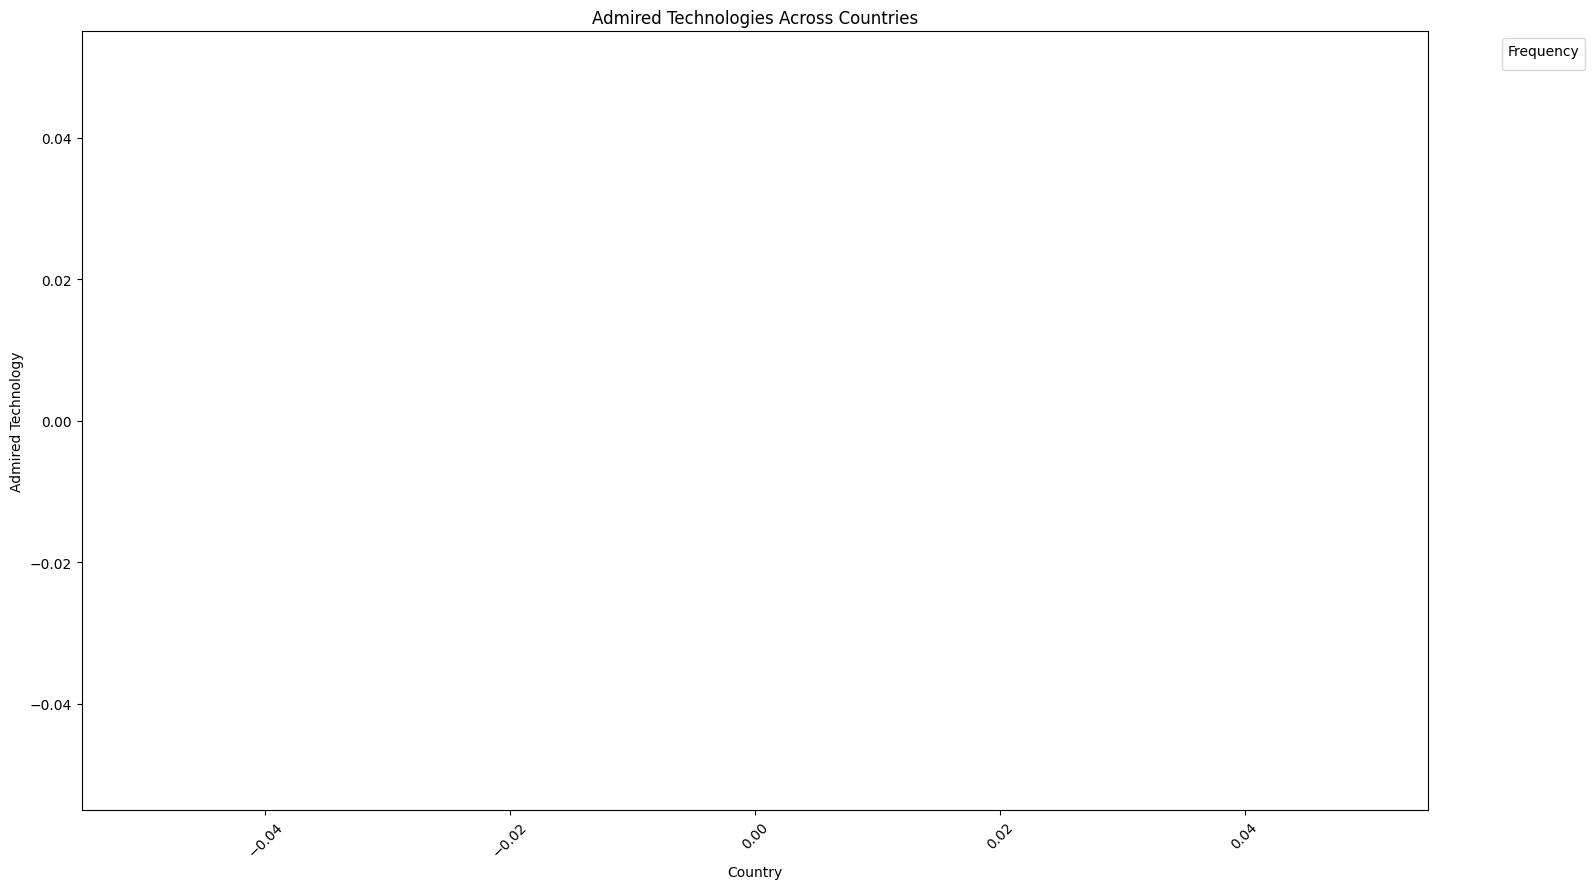

In [10]:
##Write your code here
# Drop missing data in required columns
df = df.dropna(subset=['LanguageAdmired', 'Country'])

# Explode the semicolon-separated list of admired technologies
df_lang_expanded = df.assign(AdmiredLang=df['LanguageAdmired'].str.split(';')).explode('AdmiredLang')
df_lang_expanded['AdmiredLang'] = df_lang_expanded['AdmiredLang'].str.strip()

# Count frequency of each admired technology per country
admire_counts = df_lang_expanded.groupby(['Country', 'AdmiredLang']).size().reset_index(name='Count')

# Optional: Filter top N countries to avoid overcrowding
top_countries = admire_counts['Country'].value_counts().nlargest(10).index
admire_counts = admire_counts[admire_counts['Country'].isin(top_countries)]

# Plot the bubble plot
plt.figure(figsize=(16, 9))
sns.scatterplot(data=admire_counts,
                x='Country',
                y='AdmiredLang',
                size='Count',
                sizes=(20, 600),
                alpha=0.7,
                edgecolor='black',
                legend='brief')

plt.title('Admired Technologies Across Countries')
plt.xlabel('Country')
plt.ylabel('Admired Technology')
plt.xticks(rotation=45)
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
